<a href="https://colab.research.google.com/github/inunes1904/DeepLearning/blob/main/Car_Evaluation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

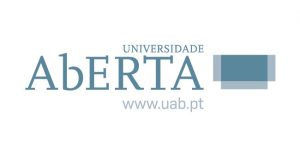

## Universidade Aberta
# Unidade Curricular: Deep Learning
# Trabalho - Parte 1
Realizado por: André Costa (Nº 2302571) e
Ivo Nunes (Nº 2302582)



---
### Bibliotecas Utilizadas

In [ ]:
! pip install pandas==0.25

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip # Caso o anterior não funcione

In [ ]:
!pip install pandas_profiling

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pickle

# EDA - Exploração e Análise dos Dados

### Carregar o dataset

In [ ]:
dados = pd.read_csv('car.data', header=None, sep=',')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Apresentação dos primeiros 5 resultados do dataset

In [ ]:
dados.head()

0      1  2  3      4     5      6
0  vhigh  vhigh  2  2  small   low  unacc
1  vhigh  vhigh  2  2  small   med  unacc
2  vhigh  vhigh  2  2  small  high  unacc
3  vhigh  vhigh  2  2    med   low  unacc
4  vhigh  vhigh  2  2    med   med  unacc

#### Apresentação dos últimos 5 resultados do dataset

In [ ]:
dados.tail()

0    1      2     3    4     5      6
1723  low  low  5more  more  med   med   good
1724  low  low  5more  more  med  high  vgood
1725  low  low  5more  more  big   low  unacc
1726  low  low  5more  more  big   med   good
1727  low  low  5more  more  big  high  vgood

### Organizar os dados para apresentar os valores
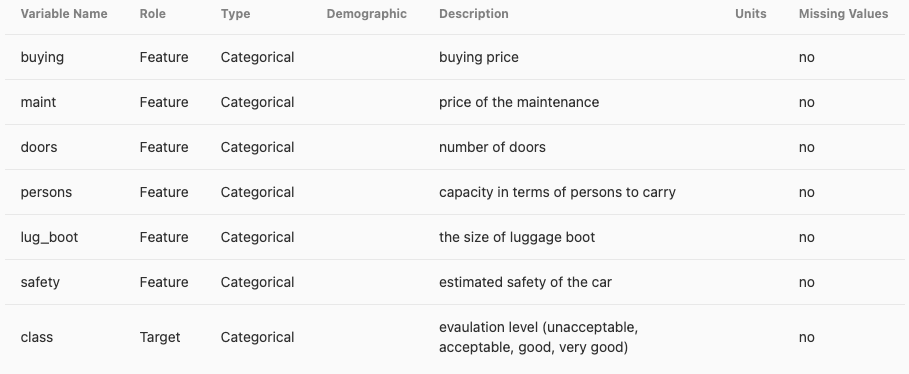

Após a análise efetuada ao dataset, detetámos que teríamos de modificar o nome de cada uma das colunas, de forma a ser mais fácil identificar e organizar os dados contidos no dataset, tendo como objetivo final a previsão da classe e das restantes "features".

Adicionalmente, efetuámos uma cópia dos dados originais do dataset, de forma a podermos realizar, caso seja necessário, alterações ao mesmo.

In [ ]:
data_arrange = pd.read_csv('car.data', header=None, sep=',',
                           names=['buying', 'maint', 'doors', 'persons','lug_boot', 'safety', 'class'])

### Visualização dos primeiros e dos últimos 5 resultados do dataset, após a organização do mesmo.

In [ ]:
data_arrange.head()

buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

In [ ]:
data_arrange.tail()

buying maint  doors persons lug_boot safety  class
1723    low   low  5more    more      med    med   good
1724    low   low  5more    more      med   high  vgood
1725    low   low  5more    more      big    low  unacc
1726    low   low  5more    more      big    med   good
1727    low   low  5more    more      big   high  vgood

Detetámos, após observação, a existência de variáveis categóricas e numéricas "misturadas", como por exemplo nas colunas "Persons" e "Doors".

Assim sendo, teremos de efetuar um data cleaning ao dataset, tal como uma sumarização e descrição estatística dos dados.

---
### Sumarização dos Dados
----
Descrição Estatística


In [ ]:
data_arrange.shape

(1728, 7)

In [ ]:
data_arrange.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

De acordo com a imagem acima, e com base na literatura existente, não poderemos utilizar as variáveis do tipo "object".

In [ ]:
for col in data_arrange.columns:
    print(f"{data_arrange[col].value_counts()} \n")

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64 

vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64 

2        432
3        432
4        432
5more    432
Name: doors, dtype: int64 

2       576
4       576
more    576
Name: persons, dtype: int64 

small    576
med      576
big      576
Name: lug_boot, dtype: int64 

low     576
med     576
high    576
Name: safety, dtype: int64 

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64 



Com base nos resultados obtidos, podemos constatar que a última distribuição se encontra extremamente desproporcional, tendo 1210 carros inaceitáveis (unacceptable), 384 aceitáveis (acceptable), 69 bons (good) e 65 muito bons (vgood), resultados esses que poderão afetar o nosso modelo.

Visualização dos Dados

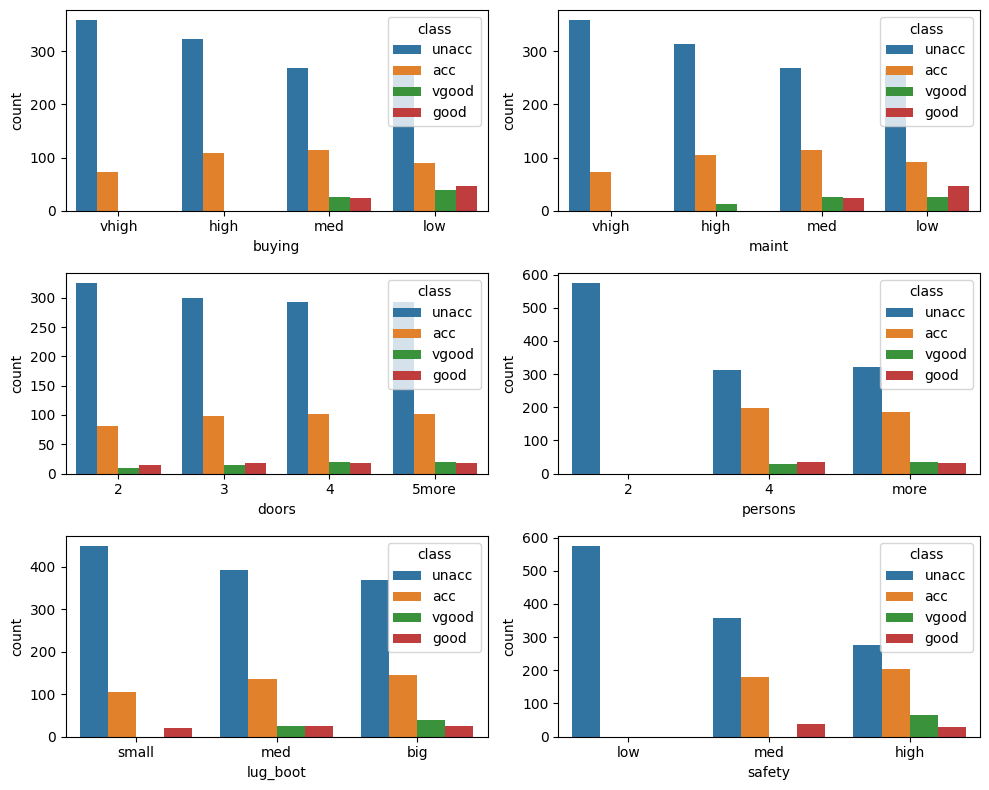

In [ ]:
from os import set_blocking
plt.figure(figsize=(10,8))

for i, col in enumerate(data_arrange.columns[:-1]):
  plt.subplot(3,2, i + 1)
  sb.countplot(data_arrange, x=col, hue='class')
plt.tight_layout()
plt.show()

Com base nos gráficos obtidos, podemos retirar as seguintes conclusões:

- No atributo “preço de compra” (buying), de um carro, não obtemos qualquer avaliação “bom” (good) ou “muito bom” (vgood) nos segmentos “vhigh” e “high”;

- O mesmo se sucede no atributo “preço da manutenção” (maint). Contudo, podemos observar que surge a avaliação “muito bom” (vgood) no segmento “high”;

- Quanto ao atributo “capacidade em número de pessoas” (persons), verificamos que os carros com uma avaliação “bom” (good), ou superior, encontram-se apenas nos segmentos “4 persons” e “more”;

- Por norma, os carros avaliados como “bom” (good) ou “muito bom” (vgood) englobam uma "bagageira" (lug_boot) média (med) ou grande (big);

- No atributo “segurança” (safety), os carros só conseguem obter uma avaliação de “bom” (good) ou “muito bom” (vgood) se tiverem um nível de segurança média (med) ou alta (high).

In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport

<ipython-input-14-2b0f948828d7>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
data_arrange.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Com base no reporte gerado, conseguimos observar tanto as características como as correlações do dataset.

---


# Preparação dos Dados

In [ ]:
X = data_arrange.iloc[:,:-1] # Exibição de todas as colunas, excepto a última (class)
Y = data_arrange.iloc[:,-1] # Exibição apenas da última coluna
Y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object

In [ ]:
encoder = OrdinalEncoder() # Criação da instância da classe “OrdinalEncoder”, sendo a mesma atribuída à variável “encoder”
                           # Esta instância será utilizada para transformar as avaliações em valores numéricos
                           # Exemplos: medium = 2 ; good = 3 ; vgood = 4
X = encoder.fit_transform(X) # O algoritmo aprende o mapeamento das categorias nos dados “X” e atribui um número inteiro único a cada uma
                             # As avaliações são transformadas em valores numéricos, com base no mapeamento aprendido durante a etapa de ajuste
X

array([[3., 3., 0., 0., 2., 1.],
       [3., 3., 0., 0., 2., 2.],
       [3., 3., 0., 0., 2., 0.],
       ...,
       [1., 1., 3., 2., 0., 1.],
       [1., 1., 3., 2., 0., 2.],
       [1., 1., 3., 2., 0., 0.]])

# Avaliação dos Algoritmos

### Efetuar o treino dos dados

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y
)
# A função “train_test_split”, do scikit-learn, permite a divisão de um conjunto de dados num conjunto de treino e de teste

# O parâmetro “test_size=0.2” significa que 20% dos dados serão utilizados para testes, enquanto que os restantes 80% serão utilizados para o treino

# O parâmetro “stratify” assegura que a divisão é efetuada de forma a manter a mesma distribuição da variável alvo “Y” nos conjuntos de treino e de teste

# Isto é particularmente útil quando lidamos com conjuntos de dados “desiquilibrados”, onde as classes não estão igualmente representadas

In [ ]:
models = [
    ('LR', LogisticRegression()),
    ('KMN', KNeighborsClassifier()),
    ('DT', DecisionTreeClassifier()),
    ('SVM', SVC()),
] # Criação de um dicionário de Tuplas, em que a primeira posição detém o nome da função e a segunda posição detém a função

for model_type, model_func in models:
  model_func.fit(X_train, Y_train)
# Utilização do método “fit”, muito comum nos modelos de Machine Learning, com o objetivo de treinar o modelo num determinado conjunto de dados

# No contexto da “Decision Tree”, modelo que iremos utilizar mais à frente, o modelo treinado aprenderá a efetuar previsões, com base nas características de “X_train”

# A estrutura da “Decision Tree” é determinada pela divisão recursiva dos dados, com base nas características que fornecem mais informações sobre a variável-alvo “Y_train”

  score = model_func.score(X_train, Y_train)
  print(f"o resultado do modelo {model_type} é: {score}\n")
# O método “score”, associado às classes dos modelos, permite o cálculo da sua precisão

# Matematicamente, o cálculo é realizado da seguinte forma:

# Precisão = Número de previsões corretas / Número total de previsões

o resultado do modelo LR é: 0.7011577424023154

o resultado do modelo KMN é: 0.9384949348769899

o resultado do modelo DT é: 1.0

o resultado do modelo SVM é: 0.9413892908827786



Após a observação realizada, iremos, tal como previamente abordado, utilizar o modelo “Decision Tree”, já que é o que contém a precisão mais elevada.

Note-se que “1.0” corresponde a 100%.

### Testagem dos Dados e Verificação do Modelo

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
score = model.score(X_test, Y_test)
print(f'Decision Tree actual score: {score}')

Decision Tree actual score: 0.9884393063583815


In [ ]:
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions ))

              precision    recall  f1-score   support

         acc       0.96      0.99      0.97        77
        good       1.00      0.93      0.96        14
       unacc       1.00      1.00      1.00       242
       vgood       1.00      0.92      0.96        13

    accuracy                           0.99       346
   macro avg       0.99      0.96      0.97       346
weighted avg       0.99      0.99      0.99       346



### Modelo e Previsão

In [ ]:
model_name = 'car_evaluation_model.pkl'
pickle.dump(model, open(model_name, 'wb'))

In [ ]:
load_model = pickle.load(open(model_name, 'rb'))
result = load_model.score(X_test, Y_test)
print(f"Saved model score: {result}")

Saved model score: 0.9884393063583815


In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(150,120))
_ = tree.plot_tree(load_model,
feature_names=data_arrange.columns[:-1],
class_names= load_model.classes_, filled=True)

O "Car Evaluation Data Set" encontra-se dividido em quatro classes de avaliação dos automóveis, “inaceitável” (unacceptable), “aceitável”(acceptable), “bom” (good) e “muito bom” (vgood), tendo em conta seis atributos distintos, “preço de compra” (buying), “preço da manutenção” (maint), “número de portas” (doors), “capacidade em número de pessoas” (persons), “bagageira” (lug_boot) e “segurança” (safety), com uma taxa de precisão de 98,8%.

De acordo com os resultados obtidos, a segurança é o principal atributo para os compradores de automóveis. Ou seja, se um cliente considerar que um automóvel não é seguro, não o irá comprar.

Verificou-se, igualmente, que se um automóvel tiver uma ocupação de lugares superior a 4 pessoas, os clientes mencionados no conjunto de dados não os irão adquirir. Contudo, se a ocupação de lugares for inferior a 4 pessoas, o custo de manutenção torna-se um fator elevado de consideração, na altura da compra do automóvel.

Caso o custo de manutenção seja baixo, o preço de compra do automóvel torna-se um fator de decisão.

Se o preço de compra do automóvel for consideravelmente baixo, então a bagageira torna-se o fator de consideração final.

Abaixo, apresentamos um pequeno exemplo que realizámos, com recurso à “Decision Tree”.

Para tal, gerámos um novo automóvel, fictício, e aplicámos a transformação dos dados e a respetiva previsão.

A avaliação final foi “inaceitável” (unacceptable).

In [ ]:

prediction_attempt = pd.read_csv('prediction_attempt.data', header=None, sep=',',
                           names=['buying', 'maint', 'doors', 'persons','lug_boot', 'safety'])

prediction_attempt = encoder.fit_transform(prediction_attempt)

prediction_result = load_model.predict(prediction_attempt)

print(prediction_result)

['unacc']
